In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../Data_exploration_notebooks')

import WranglerFunctions as wf

In [29]:
def SPX500_Wrangler(data):
    # Delete the first row (full of null values)
    df = data.drop(labels=0)

    # Delete the index column since the date is the index
    df.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    df.set_index('Dates', inplace=True)


    # Rename the column headers 
    df = df.drop(labels='Dates')
    df = df.drop(labels='#NAME?')
    df.columns = pd.MultiIndex.from_product([['SPX500 Index'], ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'PX_VOLUME']])


    # Reformat dates
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')


    
    return df



In [30]:
def F3METL_Wrangler(original_data):
# Delete the first row 
    df = original_data.drop(labels=1)

    # Rename the column headers 
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header

    # Delete the index column since the date is the index
    df.set_index('Dates', inplace=True)

    # Reformat dates
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

    # Change numbers to floats/ints (fields with NaN values are floats by default)
    df = df.apply(pd.to_numeric)

    # Drop the general earning index
    df.drop('INDX_GENERAL_EARN', axis=1, inplace=True)

    return df



In [165]:
#ebitda
earnings = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col=False, encoding = 'unicode_escape')
earnings = wf.F3Metl_Comp_Wrangler(earnings)

#unemployment
unemployment = pd.read_csv('../Datasets/Economic_dataset/Unemployment.csv', index_col=False, encoding = 'unicode_escape')
unemployment = wf.Unemployment_Wrangler(unemployment)

#inflation
inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)
inflation, _ = wf.Inflation_Unemployment_Wrangler(inflation_original)

#S&P500 index
original_SPX500 = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/SPX500.csv')
SPX500 = SPX500_Wrangler(original_SPX500)

#FTSE 350 Index
F3METL_original = pd.read_csv('../Datasets/Financial_dataset/F3METL.csv', index_col = False)
F3METL_index = F3METL_Wrangler(F3METL_original)

#income statements for every company- to get operating costs.
RIO_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/RIO_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
RIO_costs = wf.CostsWrangler(RIO_costs, 'Revenue')

GLEN_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/GLEN_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
GLEN_costs = wf.CostsWrangler(GLEN_costs, 'Revenue')

BHP_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/BHP_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
BHP_costs = wf.CostsWrangler(BHP_costs, 'Revenue')


EVR_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/EVR_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
EVR_costs = wf.CostsWrangler(EVR_costs, 'Revenue')

ANTO_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/ANTO_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
ANTO_costs = wf.CostsWrangler(ANTO_costs, 'Revenue')

AAL_costs = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/AAL_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
AAL_costs = wf.CostsWrangler(AAL_costs, 'Revenue')



0
0
0
0
0
0


In [57]:
companyNames = set(earnings.columns.get_level_values(0).tolist())

In [82]:
def getEBITDAUnique(df, companyName):
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique



,Dates,EBITDA
0,2007-07-02,2737.0
1,2007-12-31,2790.0
2,2008-06-30,2751.0
3,2008-12-31,2317.0
4,2009-06-30,1301.0
5,2009-12-31,1713.0
6,2010-06-30,1935.0
7,2010-12-31,2539.0
8,2011-06-30,2794.0
9,2012-01-02,1629.0


In [186]:
RIO_costs = RIO_costs['Operating Expenses'].to_frame()
RIO_costs

,Operating Expenses
Date,
2010-12-31,23144.6
2011-12-31,29362.9
2012-12-31,33731.6
2013-12-31,28437.0
2014-12-31,22606.1
2015-12-31,20952.9
2016-12-31,20538.3
2017-12-31,20938.1
2018-12-31,17865.1


In [58]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(earnings, company)
    
    print(company)
    print(earnings_unique)

EVR LN Equity
        Dates  EBITDA
0  2010-06-30  1089.0
1  2010-12-31  1062.0
2  2011-06-30  1580.0
3  2012-01-02  1164.0
4  2012-07-02  1079.0
5  2012-12-31   479.0
6  2013-07-01   922.0
7  2013-12-31   289.0
8  2014-06-30   912.0
9  2014-12-31   825.0
10 2015-06-30   885.0
11 2015-12-31    43.0
12 2016-06-30   548.0
13 2017-01-02   484.0
14 2017-06-30  1116.0
15 2018-01-01  1485.0
16 2018-07-02  1869.0
17 2018-12-31  1840.0
18 2019-07-01  1457.0
19 2019-12-31   679.0
20 2020-06-30   949.0
21 2020-12-31   919.0
22 2021-06-30  2061.0
GLEN LN Equity
        Dates  EBITDA
0  2007-07-02  2737.0
1  2007-12-31  2790.0
2  2008-06-30  2751.0
3  2008-12-31  2317.0
4  2009-06-30  1301.0
5  2009-12-31  1713.0
6  2010-06-30  1935.0
7  2010-12-31  2539.0
8  2011-06-30  2794.0
9  2012-01-02  1629.0
10 2012-07-02  2351.0
11 2012-12-31  2126.0
12 2013-07-01  2952.0
13 2014-06-30  5577.0
14 2014-12-31  5296.0
15 2015-06-30  4115.0
16 2015-12-31  3442.0
17 2016-06-30  2860.0
18 2017-01-02  4855.0
19 

In [84]:
companyEarnings = pd.DataFrame()
for company in companyNames:
    earnings_unique = getEBITDAUnique(earnings, company)
    
    print(company)
    
    companyEarnings = pd.concat([companyEarnings, earnings_unique], axis = 0)
companyEarnings

EVR LN Equity
GLEN LN Equity
BHP LN Equity
ANTO LN Equity
RIO LN Equity
AAL LN Equity


,Dates,EBITDA
0,2010-06-30,1089.0
1,2010-12-31,1062.0
2,2011-06-30,1580.0
3,2012-01-02,1164.0
4,2012-07-02,1079.0
...,...,...
39,2019-07-01,4700.0
40,2019-12-31,4288.0
41,2020-06-30,2949.0
42,2020-12-31,5279.0


In [85]:
companyEarnings = companyEarnings.reset_index(drop = True)

In [95]:
companyEarnings

,Dates,EBITDA
0,2010-06-30,1089.0
1,2010-12-31,1062.0
2,2011-06-30,1580.0
3,2012-01-02,1164.0
4,2012-07-02,1079.0
...,...,...
220,2019-07-01,4700.0
221,2019-12-31,4288.0
222,2020-06-30,2949.0
223,2020-12-31,5279.0


In [181]:
clean_unemployment= unemployment.rename_axis("Dates")


,Unemployment Rate
Dates,
2021-09-30,4.47
2021-06-30,4.77
2021-03-31,5.00
2020-12-31,5.10
2020-09-30,4.53
...,...
1972-06-30,4.47
1972-03-31,4.50
1971-12-31,4.37


In [173]:
inflation.set_index('Date', inplace=True)
clean_inflation = inflation.rename_axis('Dates')

KeyError: "None of ['Date'] are in the columns"

In [183]:
merged_data = pd.merge(clean_unemployment,SPX500['SPX500 Index']['PX_LAST'], on ='Dates')
df = pd.merge(merged_data, F3METL_index['PX_LAST'], on = 'Dates')
df.size

177

In [188]:
df2 = pd.merge(df,companyEarnings, on = 'Dates')
final_df = pd.merge(df2, clean_inflation, on= 'Dates')
final_df.rename(columns={'PX_LAST_x': 'SPX500 PX_LAST'}, inplace=True)
final_df.rename(columns={'PX_LAST_y': 'FTSE350 PX_LAST'}, inplace=True)
final_df

,Dates,Unemployment Rate,SPX500 PX_LAST,FTSE350 PX_LAST,EBITDA,Inflation Rate
0,2021-06-30,4.77,4297.5,6303.09,2061.0000,2.5
1,2021-06-30,4.77,4297.5,6303.09,6806.0000,2.5
2,2021-06-30,4.77,4297.5,6303.09,20181.0000,2.5
3,2021-06-30,4.77,4297.5,6303.09,2283.1000,2.5
4,2021-06-30,4.77,4297.5,6303.09,19744.0000,2.5
...,...,...,...,...,...,...
150,2001-12-31,5.13,1148.08,1733.20,1813.0000,1.1
151,2000-06-30,5.60,1454.6,2323.00,-44.0000,0.8
152,2000-06-30,5.60,1454.6,2323.00,146.8564,0.8
153,2000-06-30,5.60,1454.6,2323.00,1369.7180,0.8


# PCA Analysis


In [191]:
features = ['Unemployment Rate', 'Inflation Rate', 'SPX500 PX_LAST','FTSE350 PX_LAST', 'EBITDA']

x = final_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [192]:
x.shape

(155, 5)

In [193]:
np.mean(x),np.std(x)

(-1.6502928056363618e-16, 1.0)

In [194]:
# Converting normalised data into tabular format
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_companyEarnings = pd.DataFrame(x, columns=feat_cols)

In [195]:
normalised_companyEarnings

,feature0,feature1,feature2,feature3,feature4
0,-0.720521,0.547072,2.735177,0.675518,-0.472262
1,-0.720521,0.547072,2.735177,0.675518,0.510805
2,-0.720521,0.547072,2.735177,0.675518,3.281832
3,-0.720521,0.547072,2.735177,0.675518,-0.426248
4,-0.720521,0.547072,2.735177,0.675518,3.191295
...,...,...,...,...,...
150,-0.444709,-0.686968,-0.766490,-0.828759,-0.523643
151,-0.084622,-0.951405,-0.425687,-0.634613,-0.908375
152,-0.084622,-0.951405,-0.425687,-0.634613,-0.868834
153,-0.084622,-0.951405,-0.425687,-0.634613,-0.615482


In [196]:
pca_companyEarnings = PCA(n_components = 2)
principalComponents_earnings = pca_companyEarnings.fit_transform(x)

In [197]:
principal_Df = pd.DataFrame(data = principalComponents_earnings, columns = ['principal component 1', 'principal component 2'])
principal_Df

,principal component 1,principal component 2
0,-0.999430,1.706349
1,-0.854992,2.357889
2,-0.447857,4.194421
3,-0.992669,1.736845
4,-0.461159,4.134416
...,...,...
150,-0.732215,-1.085110
151,-0.829706,-1.231919
152,-0.823896,-1.205712
153,-0.786672,-1.037800


In [202]:
print('Variation per principal component: {}'.format(pca_companyEarnings.explained_variance_ratio_))

Variation per principal component: [0.4242436  0.27421072]


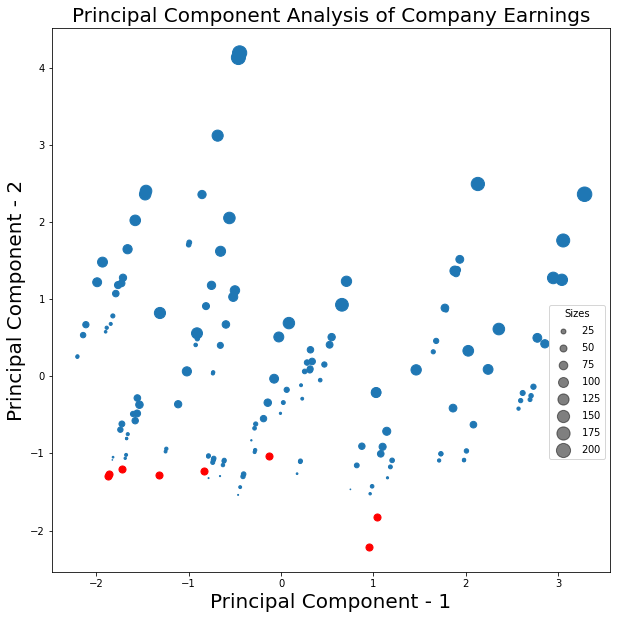

In [201]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('Principal Component - 1',fontsize=20)
ax.set_ylabel('Principal Component - 2',fontsize=20)
ax.set_title("Principal Component Analysis of Company Earnings",fontsize=20)

positiveEarnings = final_df[final_df['EBITDA'] > 0].index
negativeEarnings = final_df[final_df['EBITDA'] <= 0].index

scatter = ax.scatter(principal_Df['principal component 1'][positiveEarnings], 
            principal_Df['principal component 2'][positiveEarnings], s = final_df['EBITDA'][positiveEarnings] / 100)

scatter1 = ax.scatter(principal_Df['principal component 1'][negativeEarnings], 
            principal_Df['principal component 2'][negativeEarnings], s = 50, c = 'r')


handles, labels = scatter.legend_elements(prop="sizes", alpha = 0.5)
# Put a legend to the right of the current axis
legend = ax.legend(handles, labels, loc="best", title="Sizes", bbox_to_anchor=(1, 0.5))

plt.show()